# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

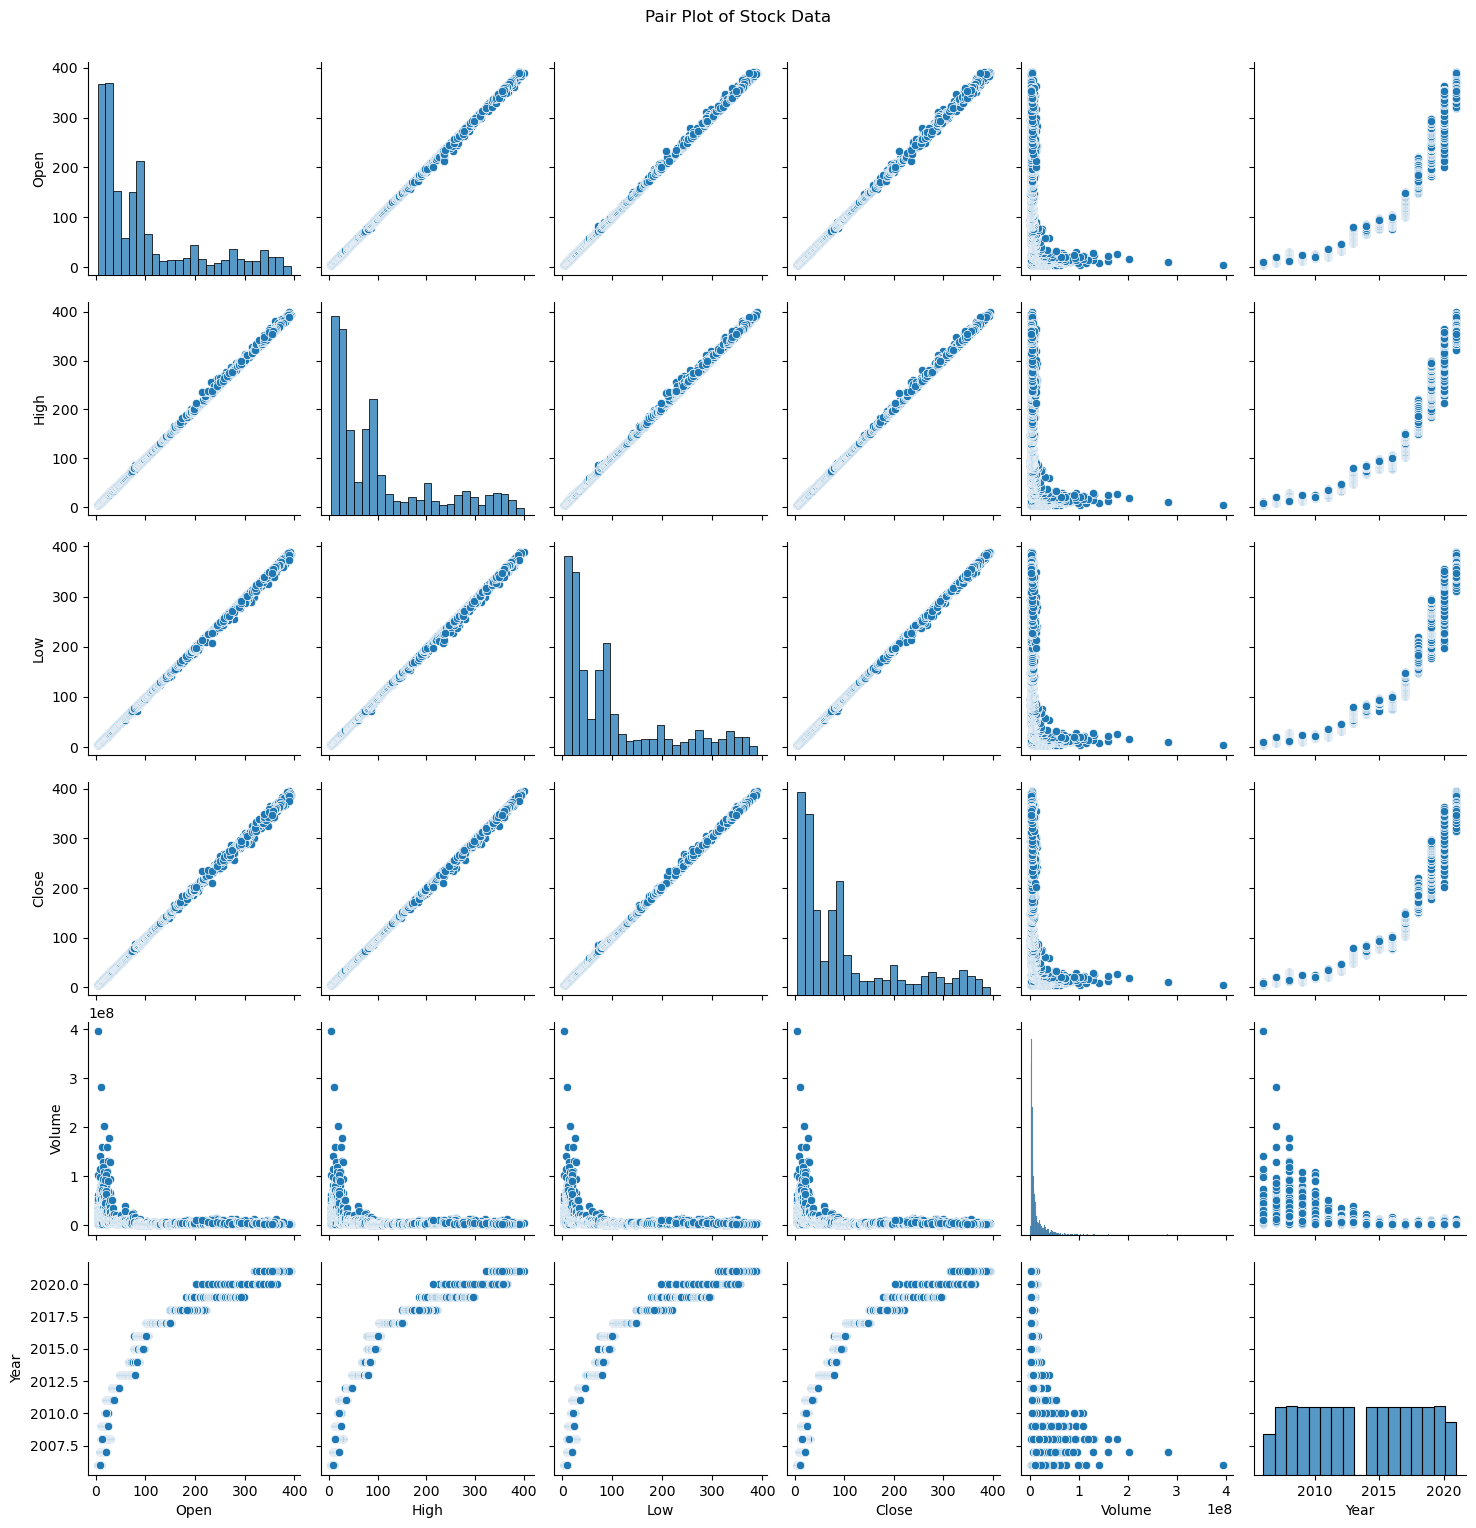

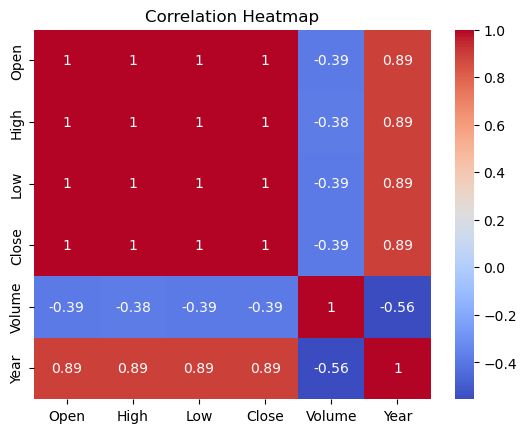

In [2]:
#pairplot
sb.pairplot(stocks_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Year']])
plt.suptitle('Pair Plot of Stock Data', y=1.02)
plt.show()

#correlation heatmap
corr_matrix = stocks_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Year']].corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [6]:
X = stocks_df['Year']
Y = stocks_df['Volume']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train
Y_train

3004    10133100
3186     3086100
3568     3542400
2737     1862800
1737     4398000
          ...   
2954     3750100
901      8462000
2153     6644500
2833     2215500
713     36507000
Name: Volume, Length: 2904, dtype: int64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [8]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     1351.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          3.30e-243
Time:                        11:05:40   Log-Likelihood:                -51915.
No. Observations:                2904   AIC:                         1.038e+05
Df Residuals:                    2902   BIC:                         1.038e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.351e+09   1.18e+08     36.863      0.000    4.12e+09    4.58e+09
Year       -2.155e+06   5.86e+04    -36.759      0.000   -2.27e+06   -2.04e+06
==============================================================================
Omnibus:                     3355.292   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           536685.600
Skew:                           5.786   Prob(JB):                         0.00
Kurtosis:                      68.586   Cond. No.                     9.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

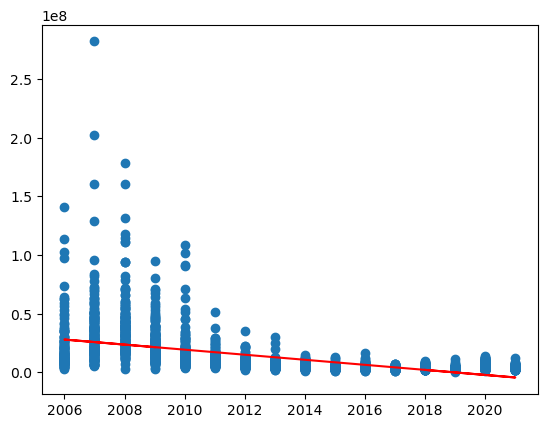

In [9]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 4.351e+09	 + -2.155e+06*X_train, 'r')
plt.show()

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

C:\Users\kkoehler\AppData\Local\Temp\ipykernel_32024\804087043.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(res, bins = 15)


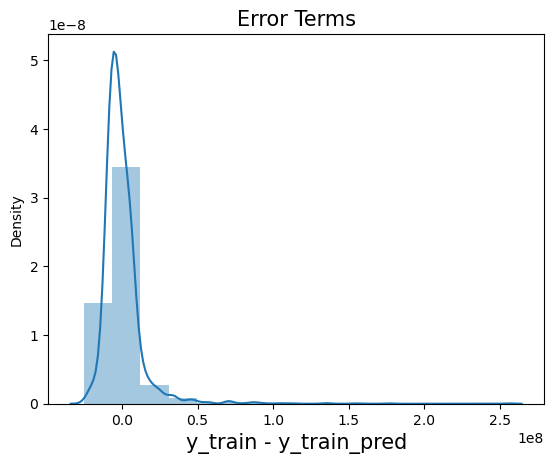

In [12]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (Y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Now plot the residuals. Did you get a bell curve?

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold? No, it was 0.318
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? Perhaps not volume based on year alone but other variables would have higher correlation. 